# Task 3) Neutrino Oscillations

In [54]:
#All relevant libraries and a style sheet for the plots

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
import pandas as pd

plt.style.use('../report.mplstyle')


## Part 0) Calculating the probability
In this task I will use the equation given in the labscript $$ P(\bar\nu_e \rightarrow \bar\nu_e) = P_\mathrm{e\rightarrow e} = 1 - A ~ \sin^2 \! \Big({1.267 \cdot \frac{\Delta m^2  L}{E}} \Big)$$
To calculate the probability of a neutrino of mass splitting $ \delta{m}$ energy $E$ at a distance $L$ from the detector and of amplitude $\sin^{2}(2\theta)$

This will be done by writing this mathematicla function as a function in python calculating the probability and plotting this array of values for different energies against the energies, this is intially plotted with default values  $\sin^2(2\theta) = 0.4$, $~L=1400\,\mathrm{m}$ and $\Delta m^2 = 2.68 \times 10^{-3}\,\text{eV}^2/c^4$

On the same plot the mass was varied for 4 other values close to that of the default value, this allows some comparison of how the probability is dependent of th emass splitting of the neutrinos this is discussed later in this record.

On another plot I now varied the amplitude of the probability function this was the $\sin^{2}(2\theta)$ term and once again plotte don the default value for comparison.

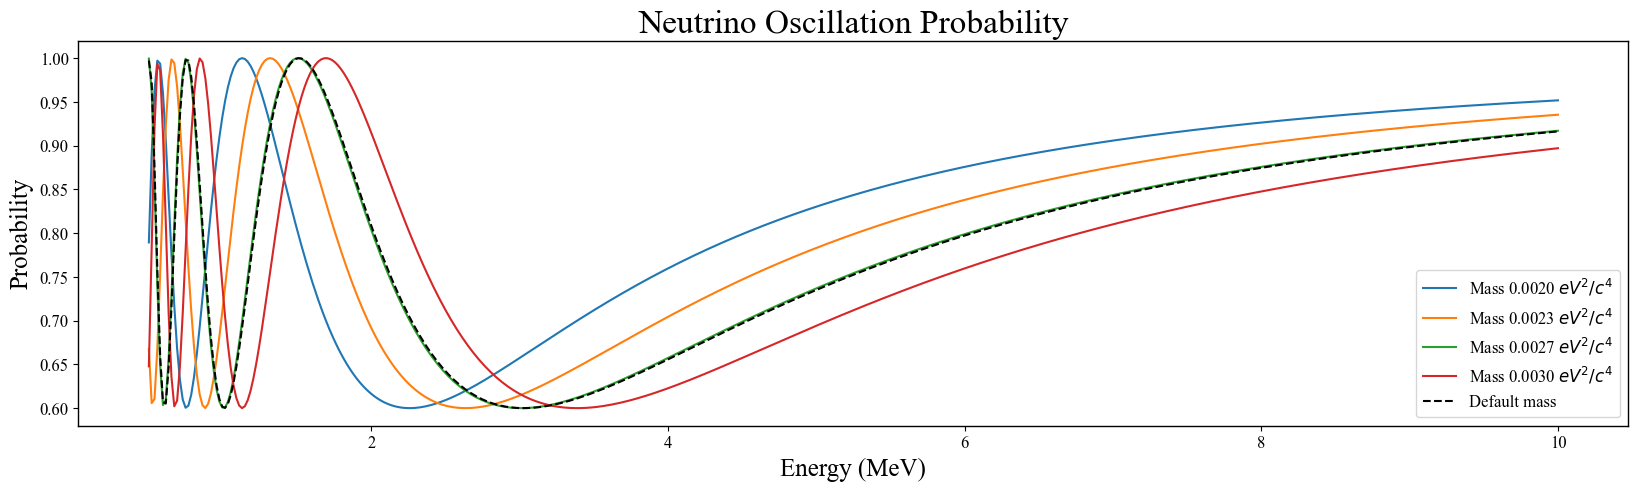

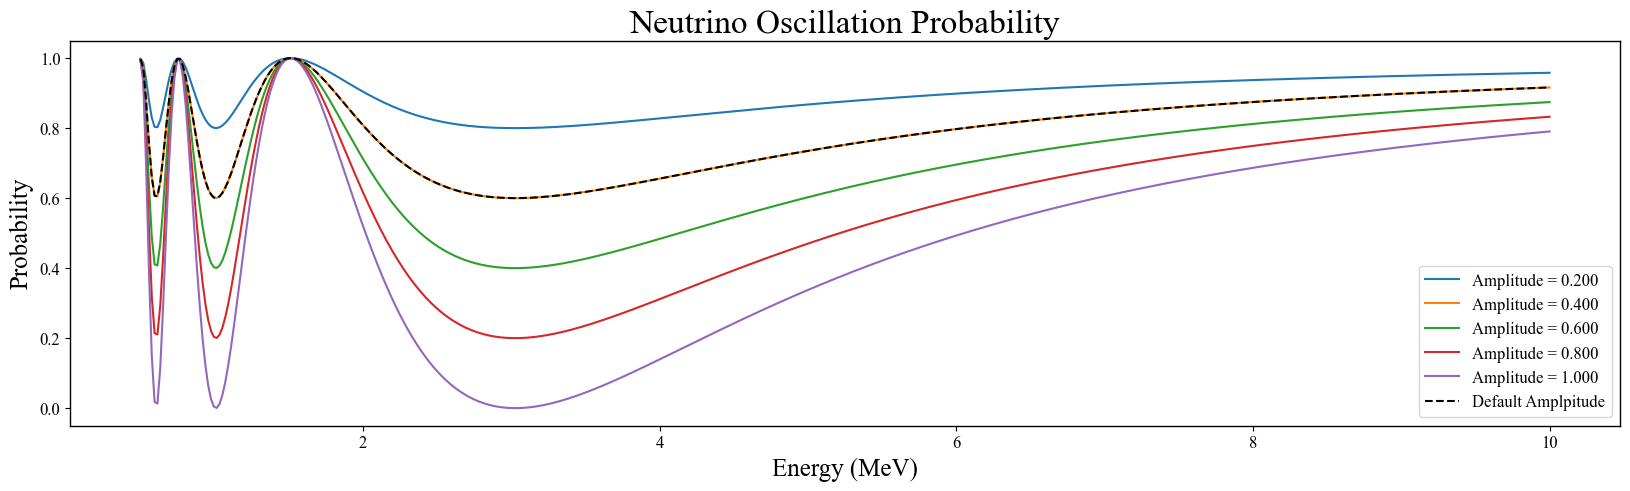

In [55]:
DEFAULT_VAL = {'energy':np.linspace(0.5,10,500),'amp':0.4,'base':1400,'delt_mass':2.68e-3}

def neu_prob(en = DEFAULT_VAL['energy'],amp = DEFAULT_VAL['amp'],base = DEFAULT_VAL['base'],mass = DEFAULT_VAL['delt_mass']):
    return 1- amp*np.sin(1.267*mass*base/en)**2




plt.figure(figsize = (20,5))
for i in range(4):
    mass_range = np.linspace(2e-3,3e-3,4)
    plt.plot(DEFAULT_VAL['energy'],neu_prob(mass = mass_range[i]),label = f'Mass {mass_range[i]:.4f}'+' $eV^{2}/c^{4}$')
plt.plot(DEFAULT_VAL['energy'],neu_prob(),label = 'Default mass',linestyle = '--',color = 'black')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability') 
plt.title('Neutrino Oscillation Probability')
plt.legend()
plt.show()



plt.figure(figsize = (20,5))
for i in range(5):
    amp_range= np.linspace(2e-1,1,5)
    plt.plot(DEFAULT_VAL['energy'],neu_prob(amp = amp_range[i]),label = f'Amplitude = {amp_range[i]:.3f}')
plt.plot(DEFAULT_VAL['energy'],neu_prob(),label = 'Default Amplpitude',linestyle = '--',color = 'black')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability') 
plt.title('Neutrino Oscillation Probability')
plt.legend()
plt.show()


From the Graphs above it is possible to see that as the mass splitting of the neutrinos increases the probability of the neutrinos existing increases for higher energies and decreases for lower energy. 
And as the Amplitude of the probabilty function decreases the probability of neutrinos at all energies increases with a lowest probability equal to a probailty of 1 - the amplitude value, so for the amplitude of 0.2 the lowest probability of finding the neutrino at any value is now 1-0.2 giving a low probability of 80% anywhere in this energy region.

## Part 1) Importing the Data

The aims of this task are to read in the data given in the reno.dat file, inspect the file to determine the units for the 5 columns of data and define the centre points of the energy range and the width if this range. 
This has been completed below and all the data has been stored in seperate columns of a dataframe for later use. The units of the values given are: the first two columns are energies and are therefore in MeV and the 3-5 columns are all counts and uncertaities on said counts and are therefore unitless.

In [56]:
data = np.loadtxt('reno.dat')
reno_data = pd.DataFrame(data,columns = ['e_min','e_max','data','data_err','pred_no_osc'])

e_avg = (reno_data['e_min']+reno_data['e_max'])/2
e_rng = (reno_data['e_max']-reno_data['e_min'])




### Part 2) Reproducing a figure from the official analysis of the data

In this next task I am required to recreate Figure 2 from the Journal paper given in the lab script which is a histogram of the counts of neutrinos (both predicted and actual counts) into bins of each energy interval. To do this the bin edges had to be established, this was done by finding the mathematical union of the two arrays e_min and e_max this new array contains all unique values form both initial arrays.

This is then used as the bins of the energies to be plotted along the x-axis of my histogram the data points that correspond to each bin are now plotted in and some general display aestetics of the figure are adjusted to improve the readability and presentation over all. The figure would then not be complete without the inclusion of the errors on the bin widths which are exactly = to $\pm \frac{1}{2}$ the bin width

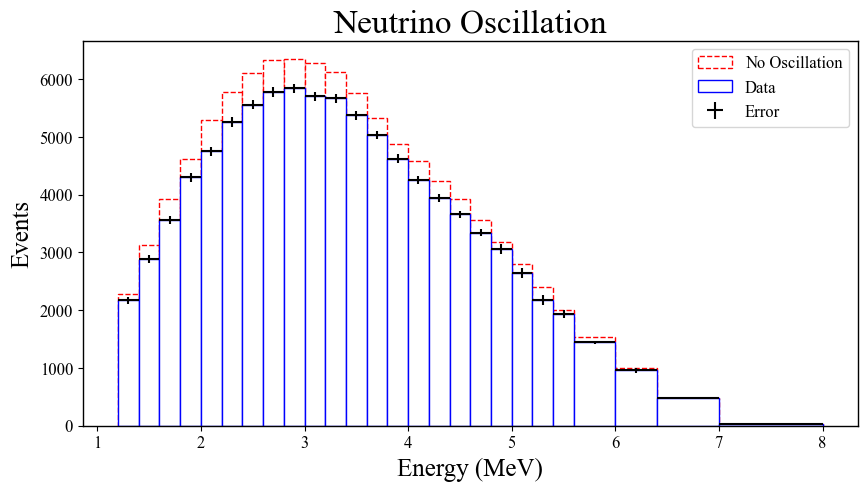

In [57]:
bin_edges = np.union1d(reno_data['e_min'],reno_data['e_max'])

plt.figure(figsize=(10,5))
plt.hist(e_avg,bins = bin_edges ,weights = reno_data['pred_no_osc'],label = 'No Oscillation',color = 'white',edgecolor = 'red',linestyle = '--')
plt.hist(e_avg,bins = bin_edges ,weights = reno_data['data'],label = 'Data',color = 'white',edgecolor = 'blue')
plt.errorbar(e_avg,reno_data['data'],yerr = reno_data['data_err'], xerr = e_rng/2,fmt = 'none',ecolor = 'black',label = 'Error')
plt.xlabel('Energy (MeV)')
plt.ylabel('Events')
plt.title('Neutrino Oscillation')
plt.legend()
plt.show()


## Part 3 Step 1 ) Fitting the data

The aims of this task are to break the problem down to make it easier to understand without too many unecessary steps and test them to see if the results obtained are close to what should be expected.
In this task 3 new functions have been defined as well as the use of the previously defined neutrino probability function. In the order of the cell below: first I defined a function to represent the model of the neutrino oscillations as given by the Neutrino probability function multiplied by the predicted values when no oscillations occurred. This takes in some parameters that can have default values such as the base and the mass. Second the Chi squared function was defined this compares the actual data to the predicted model function and returns a value of how well they match (where values closer to 0 are a better match). And finally a wrapper function was defined this will be used to pass into the Scipy minimize_scalar function to determine the best match for the amplitude.

The result for the amplitude was then used to plot a graph of the Chi squared value against the anplitude of the probability, I am only interested in the region of x = 0,1 but to improve clarity on the graph x = -1,1 has been shown.


 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 63.88026134165926
       x: 0.08727018605505904
     nit: 5
    nfev: 8


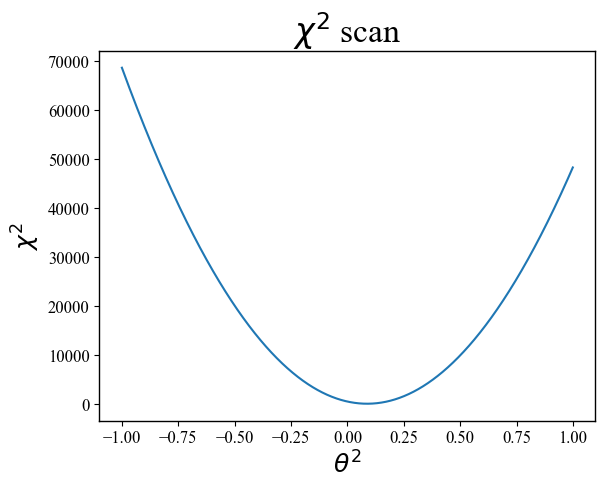

In [58]:
pred_no_osc = np.array(reno_data['pred_no_osc'])
data_val = np.array(reno_data['data'])
data_errors = np.array(reno_data['data_err'])
avg_energy = np.array(e_avg)

def modelfunc(energy,non_osc,amp,args = (1400,2.68e-3)):
    base,mass = args
    
    return non_osc*neu_prob(energy,amp,base,mass)



def chi_sq(data,data_err,model):
    chi = 0 


    for i in np.arange(1,26,1):


        chi += ((data[i]-model[i])**2/data_err[i]**2)
    return chi


def chi_wrapper(A):
    return chi_sq(data_val,data_errors,modelfunc(avg_energy,pred_no_osc,A))

result = minimize_scalar(chi_wrapper, args=())

print(result)

theta2 = np.arange(-1,1,0.001)
scan_y = np.zeros_like(theta2)
for i in range(len(theta2)):
    scan_y[i] = chi_wrapper(theta2[i])

plt.xlabel(r'$\theta^{2}$')
plt.ylabel(r'$\chi^{2}$')
plt.plot(theta2,scan_y)
plt.title(r'$\chi^{2}$ scan')
plt.show()


# Below is my first attempt at part of this task it may have worked with further development but I did not like the method i was using so moved onto the method above
# data = np.full_like(DEFAULT_VAL['energy'],0)
# data_err = np.full_like(DEFAULT_VAL['energy'],0.1)
# np.arange(1,27,1)
# data[0] = 2000
# data_err[0] = 50
        # def model(energy,non_osc,amp,args = (1400,2.68e-3)):
        # base,mass = args

        #     return non_osc*neu_prob(energy,amp,base,mass)


Just above the plot the results of the minizer funtion are shown and the 'fun' value shhown is the lowest value of the Chi squared function and the 'x' value is the amplitude that gives this lowest value. This is the value that will be used in the next task to plot the model function against the actual data.

Part 4) Writing a fit and the result

In this task I am required to plot the ratio of the actual data over the non-oscillated prediction data against the Energy of the neutrinos. 

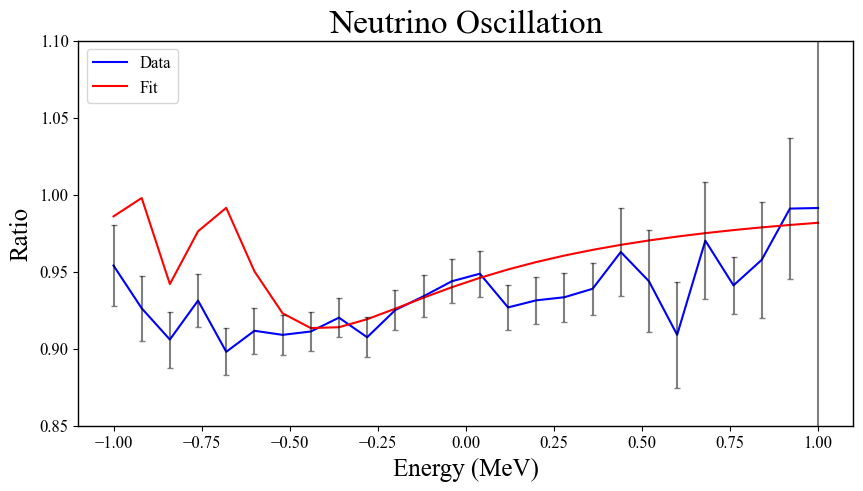

In [59]:
ratio = data_val/pred_no_osc
x_dat = np.linspace(-1,1,26)
ratio_err = ratio*np.sqrt((data_errors/data_val)**2)

plt.figure(figsize=(10,5))
plt.plot(x_dat,ratio,label = 'Data',color = 'blue')
plt.plot(x_dat,neu_prob(en = np.linspace(0.1,10,26),amp = result.x),label = 'Fit',color = 'red')
plt.errorbar(x_dat,ratio,yerr = ratio_err,fmt = 'none',ecolor = 'black',alpha = 0.5,capsize=2)
plt.xlabel('Energy (MeV)')
plt.ylim(0.85,1.1)
plt.ylabel('Ratio')
plt.title('Neutrino Oscillation')
plt.legend()
plt.show()





In the graph above the blue line is the actual data and the red line is the fit obtained after using the minimize function to find the best fit amplitude, from the graph it is possible to see that the fit follows the same trend as the data where it is decreasing at low energies and then switches to increase and tned towards 1 fo rthe probability of the neutrinos existing.

## Error Propagation

In this section I calculate the errors on the ampplitude value by propagting the errors form the data through the Chi squared function

In [60]:
ratio_err = ratio*np.sqrt((data_errors/data_val)**2)

The error on the Amplitude of the neutrino oscillations from this analysis is 0.0040


<function matplotlib.pyplot.show(close=None, block=None)>

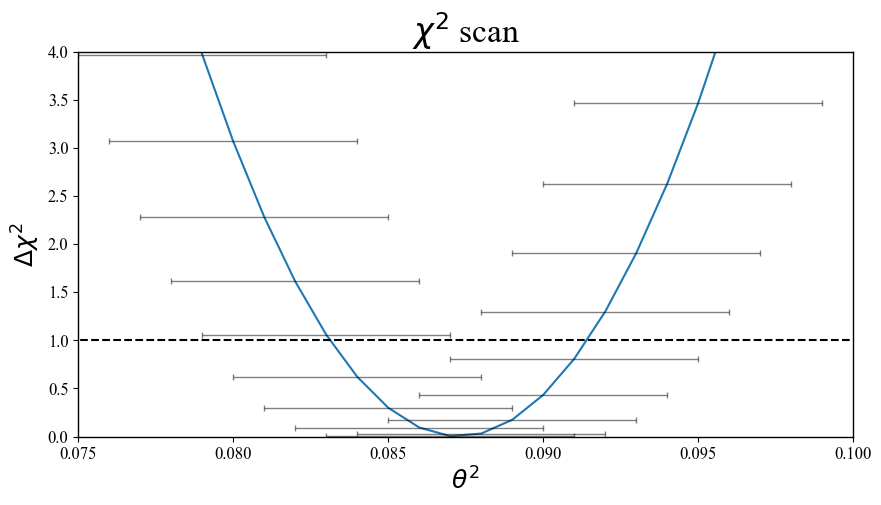

In [63]:



#print(np.where(scan_y == np.min(scan_y)))
y_val = np.zeros_like(scan_y)

# for i in range(len(scan_y)):
#     res[i] = scan_y[i]-scan_y[np.where(scan_y == np.min(scan_y))]

for i in range(len(scan_y)):
    y_val[i] = scan_y[i]-result.fun
# xllim = theta2[int(np.where(res == np.min(res)))-10]
# xulim = theta2[np.where(res == np.min(res))+10]

# zero = theta2[np.where(np.round(y_val) == 0)]
# index_theta2 = np.where(np.min(y_val)== y_val)

x_val_y_1 = theta2[np.where(np.round(y_val) == 1)]
x_err = (x_val_y_1[2]-x_val_y_1[0])/2
x_errs = np.full_like(theta2,x_err)

print(f'The error on the Amplitude of the neutrino oscillations from this analysis is {x_err:.4f}')

plt.figure(figsize=(10,5))
plt.plot(theta2,y_val)
plt.plot(theta2,np.full_like(theta2,1),linestyle = '--',color = 'black')
plt.errorbar(theta2,y_val,xerr = x_errs,fmt = 'none',color = 'black',alpha = 0.5,label = '1$\sigma$',elinewidth = 1,capsize = 2)
plt.ylim(0,4)
plt.xlim(0.075,0.10)
plt.xlabel(r'$\theta^{2}$')
plt.ylabel(r'$\Delta \chi^{2}$')
plt.title(r'$\chi^{2}$ scan')
plt.show




## Comparison with the published results

By comparing the final couple of parts of this task with the official RENO analysis the HIstogram obtained above follows the same trend and has almost identical distribution of neutrinos in the different energy bins. The Chi squared against the amplitude graph also follows the same trend bu tthe official anylysis does not show a large enough region to determine whether or not the values are similar, and finally the errors on the Amplitude value in the official analysis are quoted to be 0.0068 which is over 50% greater than the value obtained in this analysis. This could be due to inaccuracies in the method used here or because of its simplicity in th minimizer function used.

# End of Task 3
See final submitted file for appendices which is the use of the style sheet throughout